# Project 1  
### The Moonshadow Elves  
* Hongmei Zeng  
* Noah Stettler  
* Patrick Harrington  
* Yacub Bholat  
  
Due: 13 January 2020  

In [1]:
import os
from api_keys import api_key
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import requests

In [22]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LAUCN040010000000006'],"startyear":"2010", "endyear":"2018"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=([])
    for item in series['data']:
        year = item['year']
        month = item['period']
        value = item['value']
        x.append([year,month,value])

df1 = pd.DataFrame(x, columns =['Year', 'Month', 'Labor Force'])

,Year,Month,Labor Force
0,2018,M12,20946
1,2018,M11,20681
2,2018,M10,20770
3,2018,M09,20937
4,2018,M08,20957
...,...,...,...
103,2010,M05,23381
104,2010,M04,23569
105,2010,M03,23209
106,2010,M02,23156


In [3]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LAUCN040010000000005'],"startyear":"2010", "endyear":"2018"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=([])
    for item in series['data']:
        year = item['year']
        month = item['period']
        value = item['value']
        x.append([year,month,value])

df2 = pd.DataFrame(x, columns =['Year', 'Month', 'Employment'])

,Year,Month,Employment
0,2018,M12,18711
1,2018,M11,18680
2,2018,M10,18714
3,2018,M09,18943
4,2018,M08,18865
...,...,...,...
103,2010,M05,19802
104,2010,M04,19834
105,2010,M03,19252
106,2010,M02,18996


In [4]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LAUCN040010000000004'],"startyear":"2010", "endyear":"2018"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=([])
    for item in series['data']:
        year = item['year']
        month = item['period']
        value = item['value']
        x.append([year,month,value])

df3 = pd.DataFrame(x, columns =['Year', 'Month', 'Unemployment'])

,Year,Month,Unemployment
0,2018,M12,2235
1,2018,M11,2001
2,2018,M10,2056
3,2018,M09,1994
4,2018,M08,2092
...,...,...,...
103,2010,M05,3579
104,2010,M04,3735
105,2010,M03,3957
106,2010,M02,4160


In [5]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LAUCN040010000000003'],"startyear":"2010", "endyear":"2018"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=([])
    for item in series['data']:
        year = item['year']
        month = item['period']
        value = item['value']
        x.append([year,month,value])

df4 = pd.DataFrame(x, columns =['Year', 'Month', 'Unemployment Rate %'])

,Year,Month,Unemployment Rate %
0,2018,M12,10.7
1,2018,M11,9.7
2,2018,M10,9.9
3,2018,M09,9.5
4,2018,M08,10.0
...,...,...,...
103,2010,M05,15.3
104,2010,M04,15.8
105,2010,M03,17.0
106,2010,M02,18.0


In [32]:
new_df1 = pd.merge(df1, df2, how='inner')
new_df2 = pd.merge(new_df1, df3, how='inner')
cleaned_df = pd.merge(new_df2, df4, how='inner')

cleaned_df['Labor Force'] = cleaned_df['Labor Force'].astype('int')
cleaned_df['Employment'] = cleaned_df['Employment'].astype('int')
cleaned_df['Unemployment'] = cleaned_df['Unemployment'].astype('int')
cleaned_df['Employment Rate %'] = ((cleaned_df['Employment'] / cleaned_df['Labor Force']) * 100).round(1).astype('float')

monthly_df = cleaned_df[['Year','Month','Labor Force','Employment','Employment Rate %','Unemployment','Unemployment Rate %']]
monthly_df = monthly_df.sort_values(by=['Year', 'Month'])
monthly_df

In [46]:
yearly_df = pd.DataFrame({
                        'Year': monthly_df['Year'].unique(),
                        'Labor Force': monthly_df.groupby('Year')['Labor Force'].mean().astype('int'),
                        'Employment': monthly_df.groupby('Year')['Employment'].mean().astype('int'),
                        'Employment Rate (%)': ((monthly_df.groupby('Year')['Employment'].mean()/monthly_df.groupby('Year')['Labor Force'].mean())*100).round(1)
})
yearly_df

,Year,Labor Force,Employment,Employment Rate (%)
Year,,,,
2010,2010,23437,19588,83.6
2011,2011,23040,18788,81.5
2012,2012,22805,18481,81.0
2013,2013,21829,17813,81.6
2014,2014,21212,17889,84.3
2015,2015,20607,17869,86.7
2016,2016,20319,17984,88.5
2017,2017,20408,18301,89.7
2018,2018,20664,18584,89.9


In [ ]:
monthly_df = monthly_df.assign(Year_Month = monthly_df['Year'] + '-' + monthly_df['Month']),
monthly_df

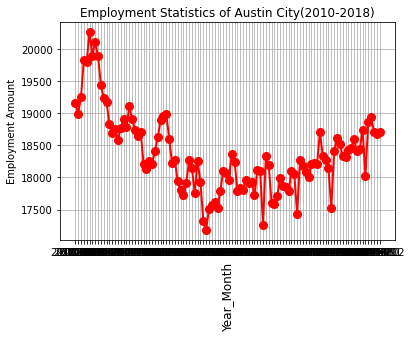

<Figure size 1080x648 with 0 Axes>

In [28]:
,x = monthly_df['Year_Month']
y = monthly_df["Employment"]
plt.plot(x, y,color='red', marker='o', linewidth=2, markersize=8)

plt.xlabel('Year_Month',rotation=90,fontsize=12)
plt.ylabel('Employment Amount')
plt.title('Employment Statistics of Austin City(2010-2018)', fontsize=12)
plt.grid(axis='both', linestyle='-')
plt.figure(figsize=(15,9))
plt.savefig('Fig Employment Statistics.png')
plt.show(),